# Explore here

In [1]:
# Your code here

import os
import pandas as pd
import requests
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1. descargar data

url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
respuesta = requests.get(url)
nombre_archivo = "demographic_health_data.csv"
with open(nombre_archivo, 'wb') as archivo:
     archivo.write(respuesta.content)

# 2. convertir csv en dataframe

total_data = pd.read_csv("../data/raw/demographic_health_data.csv")


# borrar duplicados
total_data_sin = total_data.drop_duplicates()  
total_data_sin.shape
# no hay duplicados

total_data.head()
ncols = total_data.columns.tolist()
print(ncols)

['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with les

In [2]:
# eliminar colñumnas irrelevantes. Muchos valores tienen diferencias medidas par el miosmo valor (95% CI, number, etc..)  asi que podemos eliminar algunas referencias 

total_data_cl1 = total_data.drop(['0-9', '19-Oct', '20-29','30-39','40-49','50-59', '60-69' ,'70-79','80+','White-alone pop', 'Black-alone pop','Native American/American Indian-alone pop','Asian-alone pop','Hawaiian/Pacific Islander-alone pop','Two or more races pop',], axis=1) 
total_data_cl2 = total_data_cl1.drop(['TOT_POP','Population Aged 60+','Percent of Population Aged 60+', 'fips', 'CNTY_FIPS', 'STATE_FIPS', 'CI90LBINC_2018', 'CI90UBINC_2018', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI', 'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI', 'COPD_Lower 95% CI', 'COPD_Upper 95% CI', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI', 'anycondition_number', 'Obesity_number', 'Heart disease_number', 'COPD_number', 'diabetes_number', 'CKD_number'   ], axis=1)
# total_data_cl2.info()

# el comando info nos dice que no hay null en ninguna fila. Para confirmar

total_nan = total_data_cl2.isna().sum().sum()
print('Total de valores NaN en el DataFrame es igual a', total_nan)



Total de valores NaN en el DataFrame es igual a 0


['0-9 y/o % of total pop', '10-19 y/o % of total pop', '20-29 y/o % of total pop', '30-39 y/o % of total pop', '40-49 y/o % of total pop', '50-59 y/o % of total pop', '60-69 y/o % of total pop', '70-79 y/o % of total pop', '80+ y/o % of total pop', '% White-alone', '% Black-alone', '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18', "Percent of adults completing some college or associate's degree 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18", 'POVALL_2018', 'PCTPOVAL

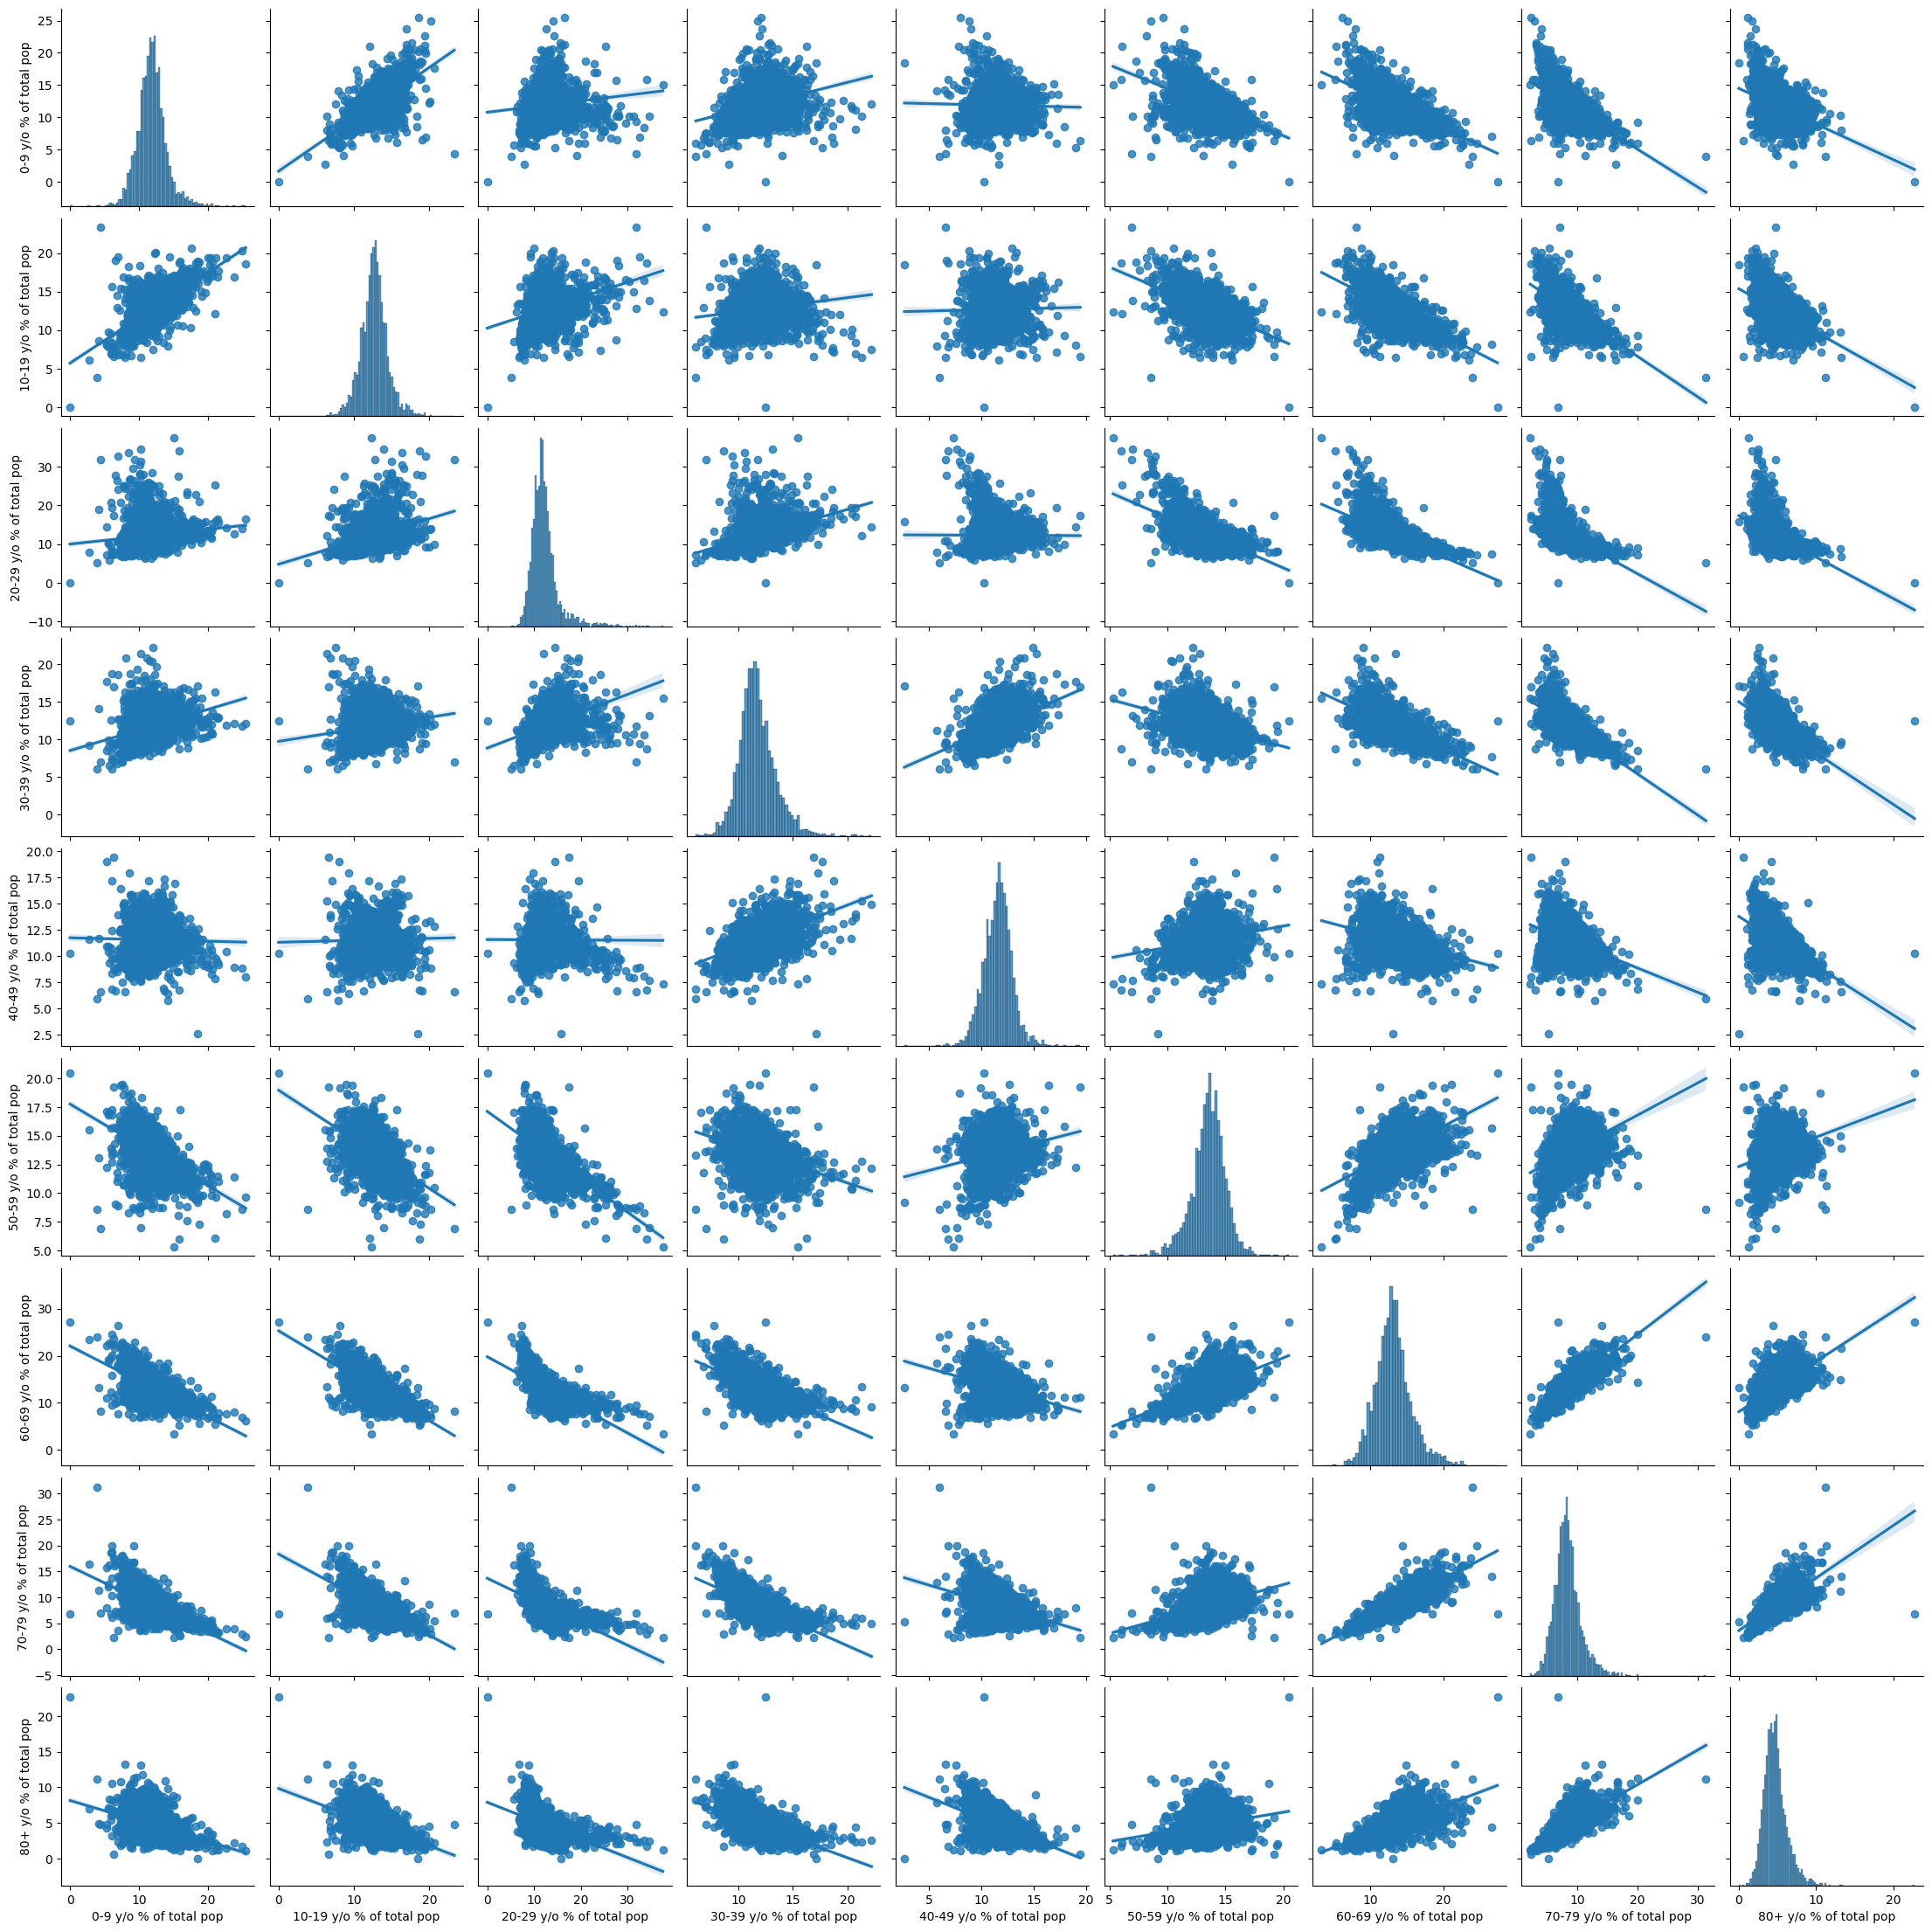

In [3]:
# vamos a agrupar las variables en conjuntos relacionados por dominios: edades, grupos etnico, datos educacion, datos laborales, datos economicos, salud, recursos sanitarios
Cl_cols = total_data_cl2.columns.tolist()
print(Cl_cols)


edad_sub = total_data_cl2[[ '0-9 y/o % of total pop', '10-19 y/o % of total pop', '20-29 y/o % of total pop', '30-39 y/o % of total pop', '40-49 y/o % of total pop', '50-59 y/o % of total pop', '60-69 y/o % of total pop', '70-79 y/o % of total pop', '80+ y/o % of total pop' ]] 
etnic_sub = total_data_cl2[['% White-alone', '% Black-alone', '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone', '% Two or more races',]]
pop_sub = total_data_cl2[['Total Population', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'county_pop2018_18 and older' ]]
edu_sub = total_data_cl2[['Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18', "Percent of adults completing some college or associate's degree 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18" ]]
work_sub = total_data_cl2[['Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Unemployment_rate_2018']]
econ_sub = total_data_cl2[['POVALL_2018', 'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'MEDHHINC_2018','Median_Household_Income_2018','Median_Household_Income_2018', 'Med_HH_Income_Percent_of_State_Total_2018',  ]]
health_sub = total_data_cl2[['anycondition_prevalence', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence',]]
sani_sub = total_data_cl2[['Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active General Surgeons per 100000 Population 2018 (AAMC)', 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)', 'Total nurse practitioners (2019)', 'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)', 'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)', 'ICU Beds_x',]]

# 'COUNTY_NAME', 'STATE_NAME', 'Urban_rural_code']

# graficamos las variables pro grupos

print("Grupos de edades")
print(edad_sub.describe())
sns.pairplot(edad_sub, kind='reg')
plt.show()

In [4]:
# analisis descriptivo por grupos


print("Estadísticas descriptivas básicas de los grupos de edad")
print(edad_sub.describe())

print("Estadísticas descriptivas básicas de los grupos por nivel educativ")
print(edu_sub.describe())

print("Estadísticas descriptivas básicas de los grupos etnicos")
print(etnic_sub.describe())

print("Estadísticas descriptivas básicas de los grupos segun empleo")
print(work_sub.describe())

print("Estadísticas descriptivas básicas de los grupos segun salud")
print(health_sub.describe())

print("Estadísticas descriptivas básicas de los grupos demoigraficos")
print(pop_sub.describe())

print("Estadísticas descriptivas básicas de los grupos segun ingresos")
print(econ_sub.describe())

print("Estadísticas descriptivas básicas de los grupos de recursos sanitarios")
print(sani_sub.describe())





Estadísticas descriptivas básicas de los grupos de edad
       0-9 y/o % of total pop  10-19 y/o % of total pop  \
count             3140.000000               3140.000000   
mean                11.871051                 12.694609   
std                  2.124081                  1.815044   
min                  0.000000                  0.000000   
25%                 10.594639                 11.674504   
50%                 11.802727                 12.687422   
75%                 12.951840                 13.659282   
max                 25.460677                 23.304372   

       20-29 y/o % of total pop  30-39 y/o % of total pop  \
count               3140.000000               3140.000000   
mean                  12.283979                 11.751535   
std                    3.126297                  1.696599   
min                    0.000000                  6.092789   
25%                   10.496774                 10.689322   
50%                   11.772649               

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Seleccionar solo las columnas numéricas
numeric_columns = total_data_cl2.select_dtypes(include=['float64', 'int64']).columns
df_numeric = total_data_cl2[numeric_columns]

# Aplicar el escalamiento solo a las columnas numéricas
scaler = MinMaxScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)
print(df_numeric_scaled.head())

   0-9 y/o % of total pop  10-19 y/o % of total pop  20-29 y/o % of total pop  \
0                0.479430                  0.589390                  0.329258   
1                0.445993                  0.529693                  0.287860   
2                0.431264                  0.510489                  0.349599   
3                0.430636                  0.497301                  0.359921   
4                0.481786                  0.561604                  0.310254   

   30-39 y/o % of total pop  40-49 y/o % of total pop  \
0                  0.412648                  0.655099   
1                  0.339172                  0.589776   
2                  0.419806                  0.578805   
3                  0.483782                  0.650697   
4                  0.360085                  0.612560   

   50-59 y/o % of total pop  60-69 y/o % of total pop  \
0                  0.568143                  0.295188   
1                  0.557352                  0.431608   

In [6]:
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df_numeric_scaled.drop(columns=["Active Physicians per 100000 Population 2018 (AAMC)"])
y = df_numeric_scaled['Active Physicians per 100000 Population 2018 (AAMC)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Conjunto de entrenamiento (X_train):")
print(X_train)
print("\nConjunto de prueba (X_test):")
print(X_test)
print("\nVariable objetivo de entrenamiento (y_train):")
print(y_train)
print("\nVariable objetivo de prueba (y_test):")
print(y_test)

Conjunto de entrenamiento (X_train):
      0-9 y/o % of total pop  10-19 y/o % of total pop  \
1292                0.475150                  0.558117   
2302                0.403902                  0.481367   
761                 0.407016                  0.581316   
2194                0.476649                  0.589934   
1241                0.487657                  0.563664   
...                      ...                       ...   
3092                0.413298                  0.657445   
1095                0.534422                  0.612131   
1130                0.549630                  0.586116   
1294                0.224339                  0.365053   
860                 0.480341                  0.567557   

      20-29 y/o % of total pop  30-39 y/o % of total pop  \
1292                  0.292110                  0.280961   
2302                  0.266708                  0.268121   
761                   0.436956                  0.338200   
2194                  0.33

In [7]:
from sklearn.feature_selection import SelectKBest, f_regression

k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()


,0-9 y/o % of total pop,GQ_ESTIMATES_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,Median_Household_Income_2018,Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total physician assistants (2019),Internal Medicine Primary Care (2019),Total Specialist Physicians (2019),anycondition_prevalence,Obesity_prevalence,diabetes_prevalence
0,0.475150,0.001699,0.198157,0.239490,0.341142,0.320301,0.358835,0.358835,0.168618,0.186353,0.223350,0.116751,0.166667,0.004977,0.003449,0.003594,0.626697,0.674352,0.389744
1,0.403902,0.007301,0.138249,0.224204,0.306003,0.282707,0.325975,0.325975,0.221747,0.203555,0.228426,0.157360,0.215686,0.011215,0.007262,0.007129,0.558824,0.518732,0.358974
2,0.407016,0.028161,0.147465,0.205096,0.216691,0.200000,0.389779,0.389779,0.083746,0.086009,0.111675,0.045685,0.107843,0.002354,0.002592,0.003266,0.565611,0.533141,0.312821
3,0.476649,0.006819,0.102919,0.309554,0.183016,0.162406,0.440576,0.440576,0.032193,0.049312,0.061760,0.030457,0.078431,0.014851,0.005378,0.007236,0.563348,0.613833,0.261538
4,0.487657,0.024258,0.118280,0.270064,0.404100,0.378947,0.344866,0.344866,0.168618,0.186353,0.223350,0.116751,0.166667,0.025160,0.017454,0.018186,0.588235,0.642651,0.328205


In [8]:
X_train_sel["Active Physicians per 100000 Population 2018 (AAMC)"] = list(y_train)
X_test_sel["Active Physicians per 100000 Population 2018 (AAMC)"] = list(y_test)

X_train_sel.to_csv("../data/processed/cl_train.csv", index = False)
X_test_sel.to_csv("../data/processed/cl_test.csv", index = False)

train_data = pd.read_csv("../data/processed/cl_train.csv")
test_data = pd.read_csv("../data/processed/cl_test.csv")

train_data.head()

X_train = train_data.drop(["Active Physicians per 100000 Population 2018 (AAMC)"], axis = 1)
y_train = train_data["Active Physicians per 100000 Population 2018 (AAMC)"]
X_test = test_data.drop(["Active Physicians per 100000 Population 2018 (AAMC)"], axis = 1)
y_test = test_data["Active Physicians per 100000 Population 2018 (AAMC)"]

y_test.info()
y_test.head()


<class 'pandas.core.series.Series'>
RangeIndex: 628 entries, 0 to 627
Series name: Active Physicians per 100000 Population 2018 (AAMC)
Non-Null Count  Dtype  
--------------  -----  
628 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB


0    0.109654
1    0.133445
2    0.060393
3    0.145951
4    0.133445
Name: Active Physicians per 100000 Population 2018 (AAMC), dtype: float64

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")


y_pred = model.predict(X_test)
y_pred

Intercepto (a): -0.006639027143722137
Coeficientes (b): [ 1.83772034e-04 -1.21532436e-02  2.47928085e-03  2.51869405e-03
  6.35732403e-03 -2.63242749e-03  3.41240773e-04  3.41240773e-04
  8.00383571e-01  8.31371737e-01 -6.09143707e-01  3.16365668e-02
 -3.94514038e-02 -8.20152304e-02 -2.87092186e-02  1.35581516e-01
  9.27405456e-03 -1.54985518e-03 -8.06835744e-03]


array([ 0.11045485,  0.13440024,  0.06187231,  0.14790881,  0.1339574 ,
        0.07815836,  0.16535889,  0.11294807,  0.11131757,  0.11186718,
        0.03330364,  0.06062314,  0.14448528,  0.11204034,  0.14644902,
        0.05092945,  0.11639272,  0.05086979, -0.0022337 ,  0.08374355,
       -0.00265035,  0.11585058,  0.11495539,  0.11115088,  0.04944848,
        0.13266931,  0.15077311,  0.11692539,  0.03278362,  0.07893547,
        0.03801234,  0.01776783,  0.0926158 ,  0.20125355,  0.05017068,
        0.06094863,  0.01605941,  0.16521979,  0.11590053,  0.16527799,
       -0.00309204,  0.09372115,  0.0765947 ,  0.05989217,  0.14463441,
        0.06060239,  0.05956937,  0.01705596,  0.11086814,  0.1124063 ,
        0.08244191,  0.05544993,  0.0081258 ,  0.05021438,  0.18611364,
       -0.00325024,  0.27746303,  0.03636719,  0.0651986 ,  0.14465914,
        0.24848517,  0.07180935,  0.03445717,  0.13308046,  0.13292146,
        0.13449495,  0.07733123,  0.14893741,  0.11501314,  0.03

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 2.165275606384001e-05
Coeficiente de determinación: 0.9943278110996654


In [11]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = 20, max_iter = 300)
lasso_model.fit(X_train, y_train)
score = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [-0.  0. -0.  0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.
 -0.]
R2 score: -0.0007080846585456602
